In [1]:
from astropy.coordinates import (SkyCoord, BarycentricTrueEcliptic, GCRS)
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import get_body_barycentric, get_body
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

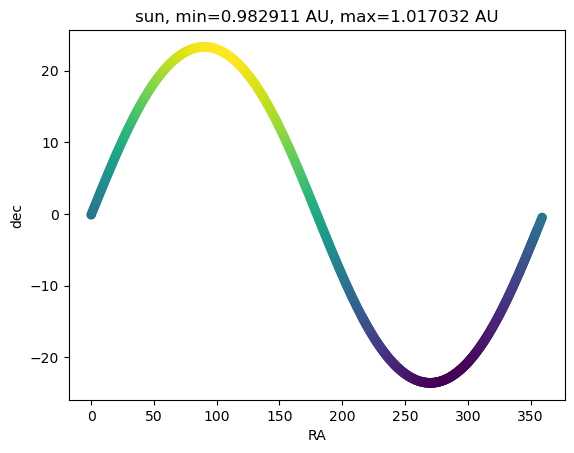

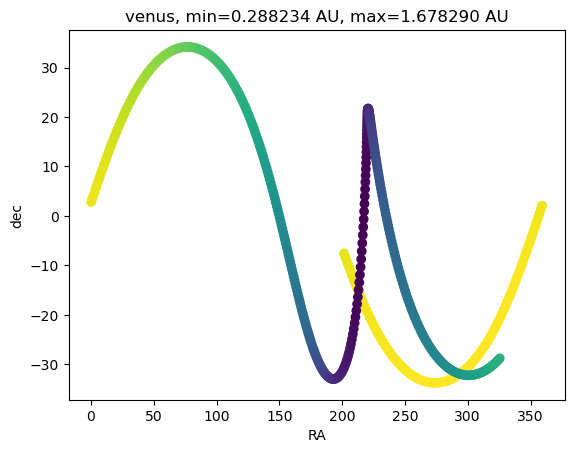

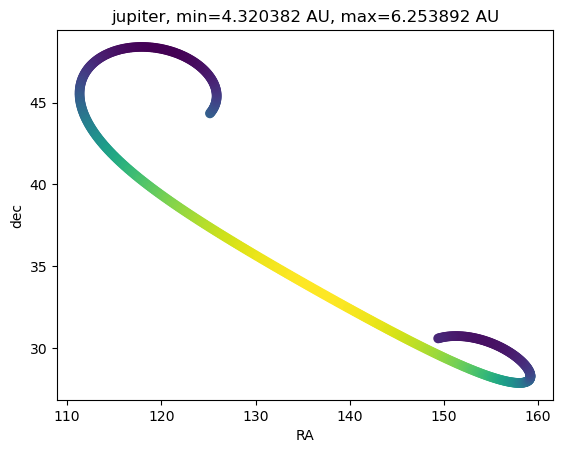

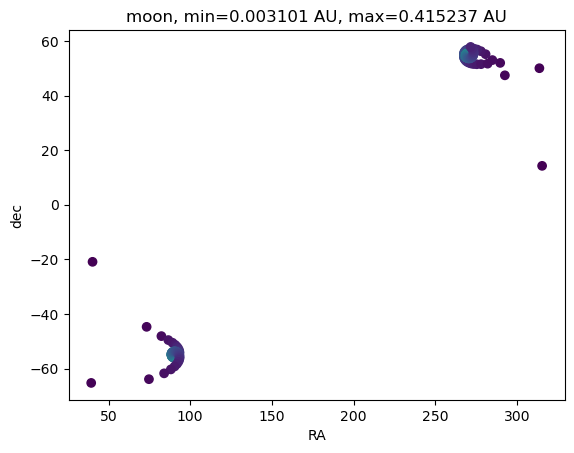

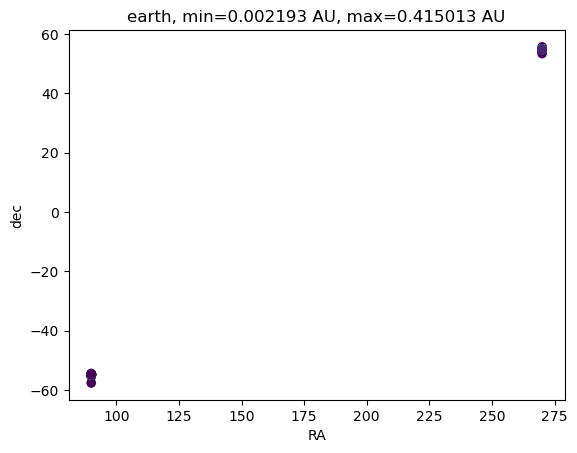

In [2]:
# set some times
mjd = np.arange(500) + 60980.0
times = Time(mjd, format="mjd")

for name in ["sun", "venus", "jupiter", "moon", "earth"]:
    body = get_body_barycentric(name, times)
    # convert to a SkyCoord
    body_sc = SkyCoord(body, representation_type='cartesian', obstime=times, frame=BarycentricTrueEcliptic)
    body_gc = body_sc.transform_to(GCRS)
    fig, ax = plt.subplots()
    ax.scatter(body_gc.ra, body_gc.dec, c=body_gc.distance.au)
    ax.set_xlabel("RA")
    ax.set_ylabel("dec")
    ax.set_title("%s, min=%f AU, max=%f AU" % (name, body_gc.distance.au.min(), body_gc.distance.au.max()))